In [113]:
import re
import os
import pandas as pd

   # Final Project
   This goal of this project is to disambiguate semantic roles in AMR that have multiple mappings in UMR (1:2,3). We have a dataest consisting of 5 parallel graphs.
   * Lindsay
   * Philippines Landslide
   * Putin
   * Edmund Pope
   * Pear Story

## Get Dataset Metrics and Split Role Definitions

In [114]:
# put all files in dicts, right now just strings, should probably update to better type for the graph
umr_files = {}
amr_files = {}

umr_path = os.getcwd() + '\\UMR-data-english'
amr_path = os.getcwd() + '\\AMR-data-english'

for f in os.listdir(umr_path):
    file1 = open(umr_path + '\\' + f, 'r')
    umr_files[f] = file1.read()

for f in os.listdir(amr_path):
    file1 = open(amr_path + '\\' + f, 'r')
    amr_files[f] = file1.read()

#Do not have all of the UMR annotations for the Putin document, so just grab everything before this sentence id from AMR
amr_files["putin_ENG_0152_2000_1208-AMR.txt"] = amr_files["putin_ENG_0152_2000_1208-AMR.txt"].split("::id NW_PRI_ENG_0152_2000_1208.13")[0]

print(umr_files)
print(amr_files)


{'lindsay-umr.txt': 'user name: jbonn\nuser id: 37\nfile language: english\nfile format: plain_text\nDoc ID in database: 1350\nexport time: 7/15/2023, 7:52:55 AM\n\n# :: snt1\t\n# Sentence:  Lindsay left in order to eat lunch .\n# sentence level graph:\n(s1l / leave-02\n    :ARG0 (s1p / person\n        :name (s1n / name :op1 "Lindsay"))\n    :Aspect Performance\n    :MODSTR FullAff\n    :purpose (s1e / eat-01\n        :ARG0 s1p\n        :ARG1 (s1l2 / lunch)\n        :Aspect Performance\n        :MODSTR FullAff))\n\n# alignment:\ns1l: 2-2\ns1p: 1-1\ns1n: 0-0\ns1e: 6-6\ns1l2: 7-7\n\n# document level annotation:\n(s1s0 / sentence\n    :temporal ((DCT :before s1l)\n            (s1l :after s1e))\n    :modal ((ROOT :MODAL AUTH)\n            (AUTH :FullAff s1l)\n            (AUTH :FullNeg s1e)))\n\n\n# :: snt2\t\n# Sentence:  If it rains , Alana won\'t water the plants .\n# sentence level graph:\n(s2w / water-01\n    :ARG0 (s2p / person\n        :name (s2n / name :op1 "Alana"))\n    :ARG1 (s2

#### Split Roles


The roles in green
<iframe src="https://drive.google.com/file/d/1iQhPIp0NwKRSu4ZUXIgIkMUF9EHHlIiQ/preview" width="640" height="480" allow="autoplay"></iframe>

In [115]:
def get_all_counts(roles_set, files_dict):
    #gets all the counts for all the items in a set of roles for all the files in files_dict
    #returns a dict with file names for keys with value of roles_ict with new counts
    roles_dict = dict.fromkeys(roles_set,0)
    files_counts = {}
    for f in files_dict.keys():
        #dict of amr roles to find
        roles_dict = roles_dict.copy()# reset the values at each iteration (dicts are mutable)
        for role in roles_dict.keys():
            roles_dict[role] = len(re.findall(r'{0}\s'.format(re.escape(role)), files_dict[f]))
        files_counts[f] = roles_dict
    return files_counts

amr_roles= {":mod",
            ":cause",
            ":part", 
            ":consist-of",
            ":source",
            ":destination",
            ":condition",
            ":concession"}

umr_roles = {":mod", #mod with a space to avoid modal
                  ":other-role",
                  ":cause",
                  ":reason",
                  ":part",
                  ":group",
                  ":material",
                  ":source",
                  ":start",
                  ":goal",
                  ":recipient",
                  ":condition",
                  ":concessive-condition",
                  ":concession"}

amr_files_counts = get_all_counts(amr_roles, amr_files)
umr_files_counts = get_all_counts(umr_roles, umr_files)
print(umr_files_counts)

{'lindsay-umr.txt': {':cause': 0, ':condition': 1, ':concessive-condition': 0, ':recipient': 0, ':group': 0, ':material': 0, ':reason': 0, ':source': 0, ':mod': 0, ':start': 0, ':goal': 0, ':concession': 0, ':part': 0, ':other-role': 0}, 'Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt': {':cause': 1, ':condition': 1, ':concessive-condition': 0, ':recipient': 0, ':group': 0, ':material': 3, ':reason': 3, ':source': 1, ':mod': 26, ':start': 0, ':goal': 1, ':concession': 2, ':part': 2, ':other-role': 0}, 'lorelei_lorpt-151_putin_2023-release.txt': {':cause': 0, ':condition': 0, ':concessive-condition': 0, ':recipient': 0, ':group': 0, ':material': 0, ':reason': 0, ':source': 1, ':mod': 15, ':start': 0, ':goal': 0, ':concession': 0, ':part': 0, ':other-role': 0}, 'lorelei_lorpt-152_edmundpope_2023-release.txt': {':cause': 0, ':condition': 0, ':concessive-condition': 0, ':recipient': 0, ':group': 0, ':material': 0, ':reason': 1, ':source': 0, ':mod': 10, ':start': 0, ':goal': 1, '

In [116]:

amr_counts_df = pd.DataFrame.from_dict(amr_files_counts, orient='index')
amr_counts_df.loc['Total'] = amr_counts_df.sum()
amr_counts_df.loc[:,'Row_Total'] = amr_counts_df.sum(axis=1)
display(amr_counts_df)

,:destination,:cause,:condition,:source,:mod,:concession,:part,:consist-of,Row_Total
edmund_pope-AMR.txt,1,0,0,0,9,0,0,0,10
lindsay-AMR.txt,0,0,1,0,0,0,0,0,1
lorpt-024_Phillipines_landslide_AMR.txt,0,0,1,2,36,2,0,0,41
pear-AMR__of__english-umr-0004.txt,1,0,0,4,29,0,1,0,35
putin_ENG_0152_2000_1208-AMR.txt,0,0,1,1,17,0,0,0,19
Total,2,0,3,7,91,2,1,0,106


In [117]:
umr_counts_df = pd.DataFrame.from_dict(umr_files_counts, orient='index')
umr_counts_df.loc['Total'] = umr_counts_df.sum()
umr_counts_df.loc[:,'Row_Total'] = umr_counts_df.sum(axis=1)
display(umr_counts_df)

,:cause,:condition,:concessive-condition,:recipient,:group,:material,:reason,:source,:mod,:start,:goal,:concession,:part,:other-role,Row_Total
lindsay-umr.txt,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt,1,1,0,0,0,3,3,1,26,0,1,2,2,0,40
lorelei_lorpt-151_putin_2023-release.txt,0,0,0,0,0,0,0,1,15,0,0,0,0,0,16
lorelei_lorpt-152_edmundpope_2023-release.txt,0,0,0,0,0,0,1,0,10,0,1,0,1,1,14
Pear_Story_2023-release.txt,1,0,0,0,0,0,2,5,18,0,1,0,2,5,34
Total,2,2,0,0,0,3,6,7,69,0,3,2,5,6,105


In [118]:
#crete role relationship dict

amr2umr_splits = dict.fromkeys(amr_roles,0)
amr2umr_splits[":mod"] = [":mod",":other-role"]
amr2umr_splits[":cause"] = [":cause",":reason"]
amr2umr_splits[":part"] = [":part"]
amr2umr_splits[":cause"] = [":cause",":reason"]
amr2umr_splits[":source"] = [":material",":source",":start"]
amr2umr_splits[":consist-of"] = [":part",":group",":material"]
amr2umr_splits[":destination"] = [":goal",":recipient"]
amr2umr_splits[":condition"] = [":condition",":concessive-condition"]
amr2umr_splits[":concession"] = [":concession",":concessive-condition"]


In [119]:
#print out relationship graph
for i in amr2umr_splits:
    j_list = []
    for j in amr2umr_splits[i]:
        j_list.append(j +" " + str(umr_counts_df.loc["Total"][j]))

    print("AMR: ", i, amr_counts_df.loc['Total'][i],"; UMR: ",j_list)

AMR:  :destination 2 ; UMR:  [':goal 3', ':recipient 0']
AMR:  :cause 0 ; UMR:  [':cause 2', ':reason 6']
AMR:  :condition 3 ; UMR:  [':condition 2', ':concessive-condition 0']
AMR:  :source 7 ; UMR:  [':material 3', ':source 7', ':start 0']
AMR:  :mod 91 ; UMR:  [':mod 69', ':other-role 6']
AMR:  :concession 2 ; UMR:  [':concession 2', ':concessive-condition 0']
AMR:  :part 1 ; UMR:  [':part 5']
AMR:  :consist-of 0 ; UMR:  [':part 5', ':group 0', ':material 3']


## Turning strings into graphs

#### UMR graphs extraction (just sentence level)

In [120]:
umr_graphs = {}
for f in umr_files:
    umr_graphs[f] = re.findall(r'(?<=sentence level graph:\n)\([^#]*(?=\n\n#)', umr_files[f])
    print(f,len(umr_graphs[f]))

lindsay-umr.txt 2
Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt 28
lorelei_lorpt-151_putin_2023-release.txt 12
lorelei_lorpt-152_edmundpope_2023-release.txt 9
Pear_Story_2023-release.txt 141


In [121]:
amr_graphs = {}
for f in amr_files:
    amr_graphs[f] = re.findall(r'(?<=[\n])\([^#]*(?=\n|)', amr_files[f])
    print(f,len(amr_graphs[f]))

edmund_pope-AMR.txt 9
lindsay-AMR.txt 2
lorpt-024_Phillipines_landslide_AMR.txt 28
pear-AMR__of__english-umr-0004.txt 141
putin_ENG_0152_2000_1208-AMR.txt 12


In [122]:
import networkx as nx
from collections import defaultdict

def clean_graph(graph_str):
    #clean graph takes in a string, strips the white space aroung it
    #changes all ': text' to start on its own line for the sake of graph making
    graph_str = graph_str.rstrip()
    
    lines= re.findall(r'.*:.*:.*',graph_str)# find lines with multiple ":"
    for line in lines:
        line = line.split(':')
        for i in range(2,len(line)):
            num_spaces = len(line[0]) - len(line[0].lstrip())
            new_str = '\n' + ' ' * num_spaces + '    ' + ":"
            graph_str = re.sub(r'(?<=[^\s]) :', new_str,graph_str,count = 1)
    print(graph_str)
    return graph_str


def get_head_spacing(curr_spacing, head_dict):
    #get the head of current line based on spacing
    all_spacings = list(head_dict.keys())
    all_spacings.sort()
    i = all_spacings.index(curr_spacing)
    head_spacing = all_spacings[i-1]
    return head_spacing
    


def extract_node(node_str):
    node_str = node_str.lstrip()
    node_list = node_str.split(' / ')
    if len(node_list) == 1:
        #no name, just a reference to an id within the graph
        [edge,node]= node_list[0].split(" ")
        node = node.strip(" ()")
        g_id = node


    else:
        node = node_list[-1].strip(')')

        if node_list[0][0] != ":":
            edge = None
            g_id = node_list[0].strip(" ()")
        else:
            [edge,g_id] = node_list[0].split(" (")
    print(node, g_id,edge)
    return node, g_id,edge

def create_graph(graph_str):
    head_dict = {}
    G = nx.DiGraph()
    graph_str = clean_graph(graph_str)
    for i in range(len(graph_str.splitlines())):
        #extact node and edge, get spacing to know what to attach it to 
        curr_line = graph_str.splitlines()[i]
        curr_node, g_id, edge = extract_node(curr_line)
        curr_spacing = len(curr_line) - len(curr_line.lstrip())
        print(curr_node,curr_spacing)
        head_dict[curr_spacing] = curr_node #update thespacing level to point to this node
        if i == 0:
            #add head node to the graph
            G.add_node(curr_node, id = g_id)
        else:
            #get head_node spacing
            head_spacing = get_head_spacing(curr_spacing, head_dict)
            head_node= head_dict[head_spacing]
        
            #attach curr_node to head_node
            G.add_node(curr_node,id = g_id)
            G.add_edge(head_node,curr_node, label = edge)#add whatever is last in the heap
            
    return G

            

            
G = create_graph(amr_graphs['lindsay-AMR.txt'][0])

(s1l / leave-02
    :ARG0 (s1p / person
        :name (s1n / name
            :op1 "Lindsay"))
    :purpose (s1e / eat-01
        :ARG0 s1p
        :ARG1 (s1l2 / lunch)))
leave-02 s1l None
leave-02 0
person s1p :ARG0
person 4
name s1n :name
name 8
"Lindsay" "Lindsay" :op1
"Lindsay" 12
eat-01 s1e :purpose
eat-01 4
s1p s1p :ARG0
s1p 8
lunch s1l2 :ARG1
lunch 8


{('leave-02',
  'person'): Text(0.8117449049695933, 0.39091574665765266, ':ARG0'),
 ('leave-02',
  'eat-01'): Text(0.04951560754382245, -0.21694186229563228, ':purpose'),
 ('person', 'name'): Text(0.2004844520608203, 0.8783796811655699, ':name'),
 ('name', '"Lindsay"'): Text(-0.5617448453649505, 0.7044058436357687, ':op1'),
 ('eat-01', 's1p'): Text(-0.5617448751672719, -0.7044057968035494, ':ARG0'),
 ('eat-01', 'lunch'): Text(-0.13873957689354838, -0.6078576600429786, ':ARG1')}

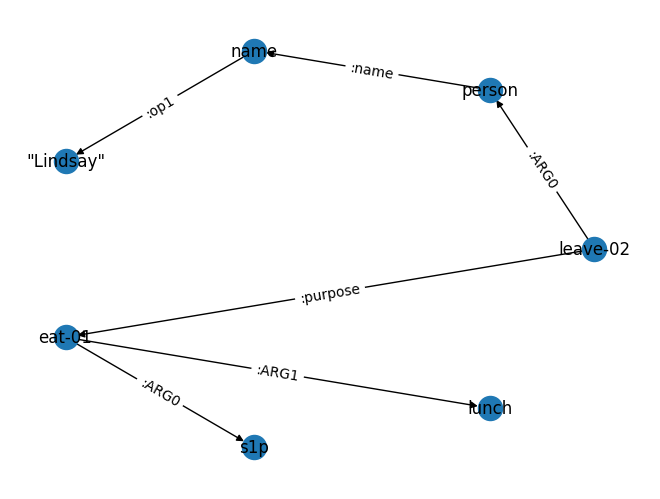

In [123]:
pos = nx.circular_layout(G)   
nx.draw(G,pos, with_labels = True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'))